In [1]:
!pip install segmentation_models
!pip install albumentations 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2


import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize
import segmentation_models as sm


import model_utility
import preprocess_filter

Segmentation Models: using `keras` framework.


Which model is this? - both_spoke_170im_300e_resnet34.json
Last Train IOU Score:  0.7302731275558472
Last Train Loss Score:  0.010877846740186214
Last Validation IOU Score:  0.4741766154766083
Last Validation Loss Score:  0.04236626625061035
Which model is this? - bothGB_spoke_1200im_400e_resnet34.json
Last Train IOU Score:  0.9988577365875244
Last Train Loss Score:  5.2812101785093546e-05
Last Validation IOU Score:  0.9260514974594116
Last Validation Loss Score:  0.00015130822430364788
Which model is this? - both_shift_spoke_1200im_300e_resnet34.json
Last Train IOU Score:  0.9820398092269897
Last Train Loss Score:  0.0006741999532096088
Last Validation IOU Score:  0.8760672807693481
Last Validation Loss Score:  0.007943793199956417
Which model is this? - all_fixed_norm_spoke_170im_300e_resnet34.json
Last Train IOU Score:  0.8688499927520752
Last Train Loss Score:  0.005262530874460936
Last Validation IOU Score:  0.5058510303497314
Last Validation Loss Score:  0.062275245785713196
Whic

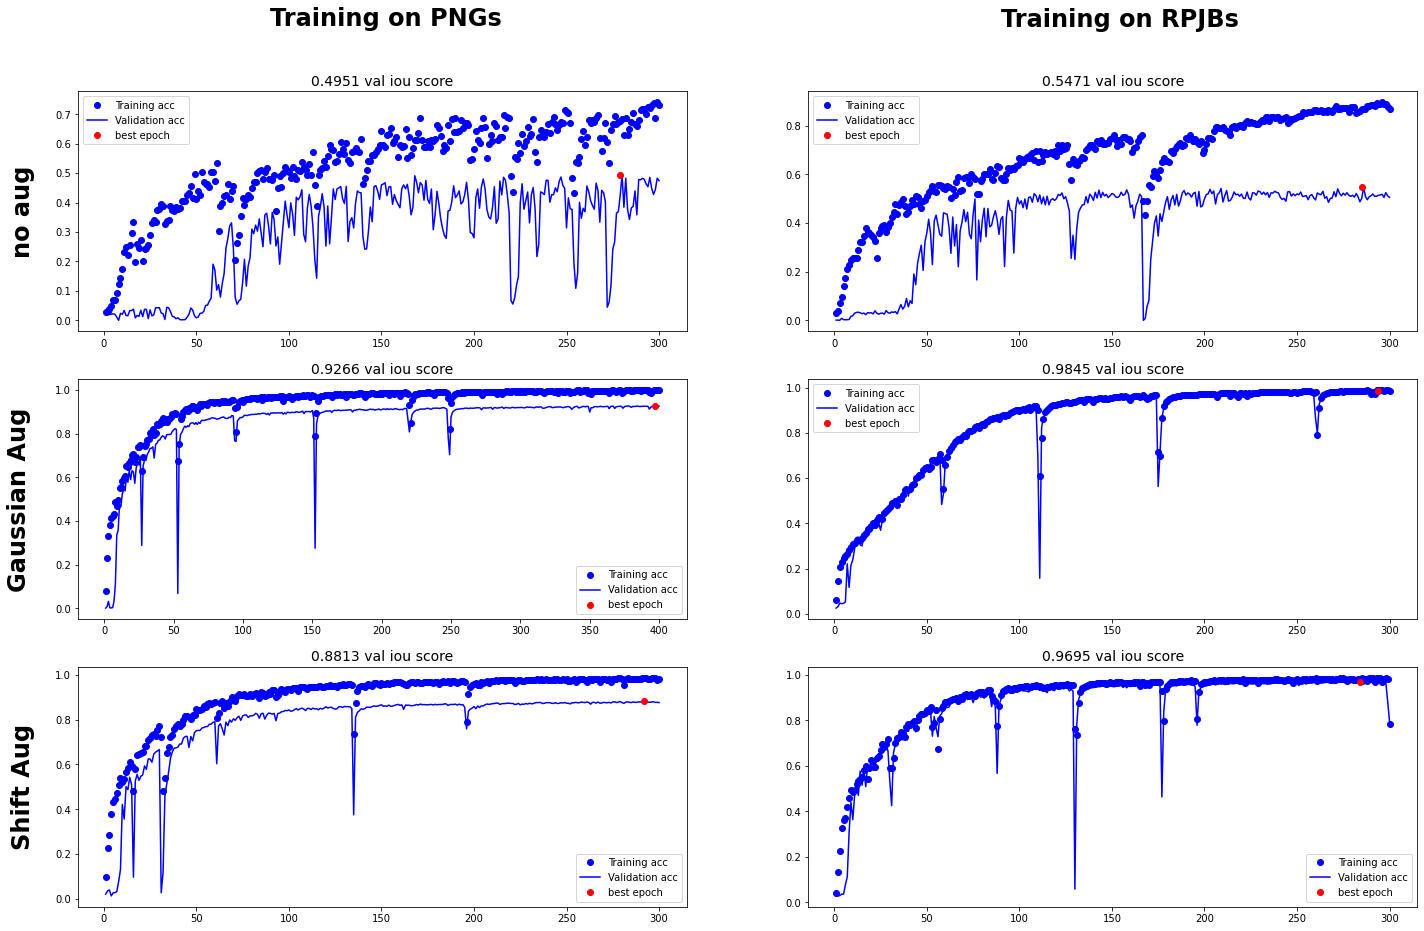

In [2]:
fig, axs = plt.subplots(3, 2, figsize = (24, 15))

axs[0, 0].text(90, 1, s = 'Training on PNGs', fontweight = 'bold', fontsize = 24)
axs[0, 1].text(90, 1.21, s = 'Training on RPJBs', fontweight = 'bold', fontsize = 24)

axs[0, 0].text(-50, 0.23, s = 'no aug', fontweight = 'bold', fontsize = 24, rotation = 90)
axs[1, 0].text(-70, 0.1, s = 'Gaussian Aug', fontweight = 'bold', fontsize = 24, rotation = 90)
axs[2, 0].text(-50, 0.24, s = 'Shift Aug', fontweight = 'bold', fontsize = 24, rotation = 90)


model_utility.display_results("models/both/both_spoke_170im_300e_resnet34.json", axs[0,0])
model_utility.display_results("models/both_big_aug/bothGB_spoke_1200im_400e_resnet34.json", axs[1, 0])
model_utility.display_results("models/both_big_aug/both_shift_spoke_1200im_300e_resnet34.json", axs[2, 0])

model_utility.display_results("models/rpjb_models/all_fixed_norm_spoke_170im_300e_resnet34.json", axs[0,1])
model_utility.display_results("models/rpjb_models/all_aug_gaus_fixed_norm_spoke_1020im_300e_resnet34.json", axs[1, 1])
model_utility.display_results("models/rpjb_models/all_aug_shift_fixed_norm_spoke_1020im_300e_resnet34.json", axs[2, 1])

In [21]:
rpjb_path = "../datasets/spokes_test_rpjbs/W1593680167_1_CALIB.rpjb"
png_path = "../datasets/spklfmovprocessed/W1593680167.png"

In [10]:
rpjb_model_path_list = ["models/rpjb_models/all_fixed_norm_spoke_170im_300e_resnet34.h5",
"models/rpjb_models/all_aug_gaus_fixed_norm_spoke_1020im_300e_resnet34.h5",
"models/rpjb_models/all_aug_shift_fixed_norm_spoke_1020im_300e_resnet34.h5"]

png_model_path_list = ["models/both/both_spoke_170im_300e_resnet34.h5",
"models/both_big_aug/bothGB_spoke_1200im_400e_resnet34.h5",
"models/both_big_aug/both_shift_spoke_1200im_300e_resnet34.h5"]

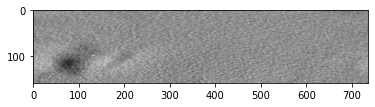

In [16]:
plt.imshow(preprocess_filter.apply_filters(rpjb_path), cmap = "gray")

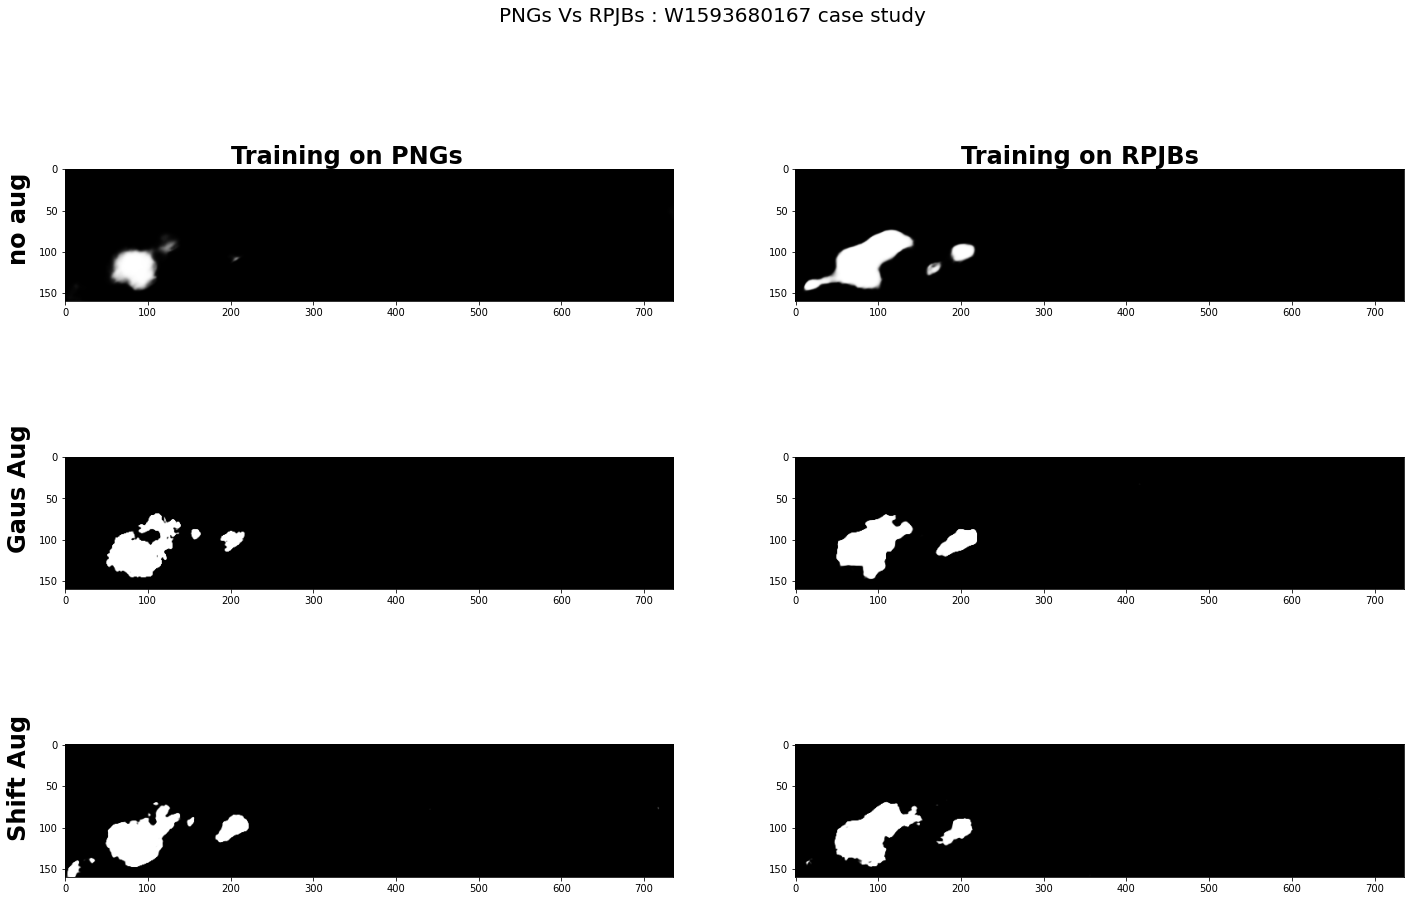

In [38]:
f, axes = plt.subplots(3, 2, figsize = (24, 15))
f.suptitle("PNGs Vs RPJBs : W1593680167 case study", fontsize = 20)

img_list = [preprocess_filter.apply_filters(rpjb_path)]
img_list = normalize(np.array(img_list))
img = img_list[0].reshape((1, 160, 736))

axes[0, 0].text(200, -6, s = 'Training on PNGs', fontweight = 'bold', fontsize = 24)
axes[0, 1].text(200, -6, s = 'Training on RPJBs', fontweight = 'bold', fontsize = 24)

axes[0, 0].text(-70, 110, s = 'no aug', fontweight = 'bold', fontsize = 24, rotation = 90)
axes[1, 0].text(-70, 110, s = 'Gaus Aug', fontweight = 'bold', fontsize = 24, rotation = 90)
axes[2, 0].text(-70, 110, s = 'Shift Aug', fontweight = 'bold', fontsize = 24, rotation = 90)


# print(model_paths)
for axe, path in zip(axes[:, 1], rpjb_model_path_list):
    # print(path)
    model_name = path.split("/")[-1].split("_")[0]

    axe.set_title(model_name)
    model = tf.keras.models.load_model(path, compile = False)
    model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()],)

      
    prediction = model.predict(img, verbose = False)
    prediction = prediction.reshape((160, 736))

    axe.imshow(prediction, cmap = "gray")
    axe.set_title("")

img_list = [cv2.imread(png_path, cv2.IMREAD_GRAYSCALE)]
img_list = normalize(np.array(img_list), axis=1)
img = img_list[0].reshape((1, 160, 736))

for axe, path in zip(axes[:, 0], png_model_path_list):
    # print(path)
    model_name = path.split("/")[-1].split("_")[0]

    axe.set_title(model_name)
    model = tf.keras.models.load_model(path, compile = False)
    model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()],)

      
    prediction = model.predict(img, verbose = False)
    prediction = prediction.reshape((160, 736))
    prediction = np.flipud(prediction)
    axe.imshow(prediction, cmap = "gray")
    axe.set_title("")

In [24]:


img_list = [cv2.imread(png_path, cv2.IMREAD_GRAYSCALE)]
img_list = normalize(np.array(img_list), axis=1)
img = img_list[0].reshape((1, 160, 736))

for axe, path in zip(axes[:, 0], png_model_path_list):
    # print(path)
    model_name = path.split("/")[-1].split("_")[0]

    axe.set_title(model_name)
    model = tf.keras.models.load_model(path, compile = False)
    model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()],)

      
    prediction = model.predict(img, verbose = False)
    prediction = prediction.reshape((160, 736))

    axe.imshow(prediction, cmap = "gray")
plt.show()